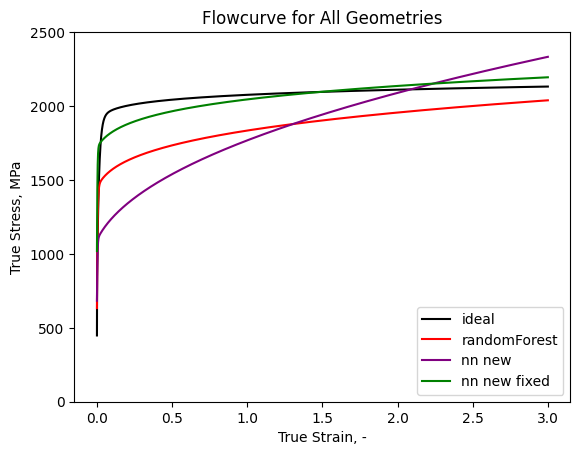

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def swiftVoceT(x, c1, c2, c3, c4, c5, c6, c7):
    return c1*c2*(x + c3) ** c4  +  (1-c1)*c5 + c6 * (1 - np.exp(-c7 * x))

truePlasticStrain = np.arange(0, 3.0005, 0.0005)
y_line_maxStress_sw_ideal = swiftVoceT(truePlasticStrain, 0.5, 1300, 2.3 * 10**-14, 0.075, 773.18, 1039.37, 73.94)
y_line_maxStress_sw_one = swiftVoceT(truePlasticStrain,0.48677003383636475, 1063.31396484375, 0.04777658358216286, 0.49148795008659363, 1053.936279296875, 534.5250244140625, 487.7805480957031)
y_line_maxStress_sw_randomForest = swiftVoceT(truePlasticStrain,0.5139736735702103, 1195.916454402472, 0.023765172822753193, 0.2637934652246432, 831.7697967468094, 811.5048884934508, 251.41025788472933)
y_line_maxStress_sw_pca_2 = swiftVoceT(truePlasticStrain,0.37446391582489014, 1111.656982421875, 0.04783067852258682, 0.43702247738838196, 1379.1180419921875, 594.864013671875, 468.5262145996094)
y_line_maxStress_sw_nn_new = swiftVoceT(truePlasticStrain, 0.6687430739402771, 1276.127197265625, 0.043472327291965485, 0.4672930836677551, 1467.2874755859375, 411.266357421875, 347.3883361816406) 
y_line_maxStress_sw_nn_new_fixed = swiftVoceT(truePlasticStrain, 0.6687430739402771, 1276.127197265625, 0.043472327291965485, 0.15, 1467.2874755859375, 700, 347.3883361816406) 

# c4, IDEAL: 0.075 
# N: HARDENING EXPONENT 
# FOR MARTENSENIC STEELS RANGES FROM 0.04 TO ???
# MAYBE I CAN SAY 0.04 TO 0.2? --> I GOTTA JUSTIFY THE UPPER EDGE 
# UPPER EDGE JUSTIFICATION (0.15): https://www.researchgate.net/figure/Work-hardening-exponents-obtained-at-different-strain-rates-for-the-DP-base-metals-and_fig3_225665138
# LOWER EDGE JUSTIFICATION (0.04): https://www.osti.gov/servlets/purl/4703707#:~:text=Strain%20hardening%20exponents%20give%20a,and%20some%20austenitic%20stainless%20steels 

# c6, IDEAL: 1039.37 
# SATURATION STRESS
# MAYBE I CAN SAY 700 MPA - 1500 MPA (CHATGPT)
# THIS SHOWS 1 TO 1 RATIO BETWEEN SATURATION STRESS AND TRUE ULTIMATE TENSILE STRESS: https://www.researchgate.net/figure/ariations-of-saturation-stress-r-S-Voce-with-true-ultimate-tensile-strength-r-U-for_fig2_257794832
# THIS SHOWS THAT ULTIMATE TENSILE STRESS USUALLY RANGES FROM 700 TO 1200 IN HIGH STRENGTH STEELS AT ROOM TEMPERATURE: https://www.sciencedirect.com/science/article/abs/pii/S0143974X22000566 

plt.figure(1)
plt.plot(truePlasticStrain, y_line_maxStress_sw_ideal, color='black', label='ideal')
plt.plot(truePlasticStrain, y_line_maxStress_sw_randomForest, color = 'red', label='randomForest')
plt.plot(truePlasticStrain, y_line_maxStress_sw_nn_new, color = 'purple', label='nn new')
plt.plot(truePlasticStrain, y_line_maxStress_sw_nn_new_fixed, color = 'green', label='nn new fixed')

plt.title('Flowcurve for All Geometries')
plt.ylim(bottom=0, top=2500)
plt.xlabel('True Strain, -')
plt.ylabel('True Stress, MPa')
plt.legend()
plt.show()



In [25]:
# Individual errors for the 5% deviation
errors_5_percent = [2, 5, 100, 4, 5, 5, 5]  # These are the errors for c1 to c7

# Calculate the average error
average_error_5_percent = sum(errors_5_percent) / len(errors_5_percent)

print(f'Average error: {average_error_5_percent:.2f}%')

sorted_errors = sorted(errors_5_percent)
n = len(sorted_errors)
if n % 2 == 1:
    median_error_5_percent = sorted_errors[n // 2]
else:
    middle1 = sorted_errors[n // 2 - 1]
    middle2 = sorted_errors[n // 2]
    median_error_5_percent = (middle1 + middle2) / 2

print(f'Median error: {median_error_5_percent:.2f}%')

Average error: 18.00%
Median error: 5.00%


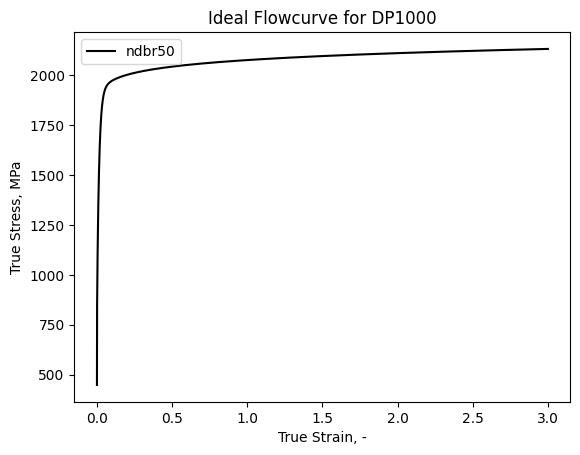

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def swiftVoceT(x, c1, c2, c3, c4, c5, c6, c7):
    return c1*c2*(x + c3) ** c4  +  (1-c1)*c5+ c6* (1 - np.exp(-c7 * x))

truePlasticStrain = np.arange(0, 3.0005, 0.0005)
y_line_maxStress_sw_ndbr50 = swiftVoceT(truePlasticStrain, 0.5, 1300, 2.3 * 10**-14, 0.075, 773.18, 1039.37, 73.94)

fig1, ax1 = plt.subplots()

plt.figure(1)
plt.plot(truePlasticStrain, y_line_maxStress_sw_ndbr50, color='black', label='ndbr50')

plt.title('Ideal Flowcurve for DP1000')
#plt.xlim(left=0.0, right=3)
#plt.ylim(bottom=0, top=2000)
plt.xlabel('True Strain, -')
plt.ylabel('True Stress, MPa')
ax1.legend()
plt.show()
